# Shopify App Store Capstone Project
7.17.22

## Objectives

This notebook will be used to gather and organize data for my Shopify App Store Capstone Project

## 1. Sourcing and Loading & Cleaning Data
Data sources:
    https://www.kaggle.com/datasets/usernam3/shopify-app-store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

pd.options.display.max_columns = None
#pd.options.display.max_rows = None


In [2]:
# Location of invididual CSV files being used
csv_dict = {
    'apps':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/apps.csv",
    'apps_categories':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/apps_categories.csv",
    'categories':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/categories.csv",
    'reviews':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/reviews.csv"
    }

# Reading each file into a dataframe & storing in a dictionary
df_dict = {}

for k, v in csv_dict.items():
    df = pd.read_csv(v)
    df_dict[k] = df

df_dict_keys = list(df_dict.keys())
print(df_dict_keys)

['apps', 'apps_categories', 'categories', 'reviews']


In [3]:
#looping through csv summary info
for index, (k, v) in enumerate(df_dict.items()):
    print("DataFrame " + str(index + 1) + " of " + str(len(df_dict_keys)) + ": " + k)
    print(v.shape)
    print(v.columns)
    print(v.index)
    print(v.isnull().sum())
    print(v.dtypes)
    print("----------------------------")


DataFrame 1 of 4: apps
(4750, 12)
Index(['id', 'url', 'title', 'developer', 'developer_link', 'icon', 'rating',
       'reviews_count', 'description_raw', 'description', 'tagline',
       'pricing_hint'],
      dtype='object')
RangeIndex(start=0, stop=4750, step=1)
id                    0
url                   0
title                 0
developer             0
developer_link        0
icon                  0
rating                0
reviews_count         0
description_raw       0
description           0
tagline               0
pricing_hint       1980
dtype: int64
id                  object
url                 object
title               object
developer           object
developer_link      object
icon                object
rating             float64
reviews_count        int64
description_raw     object
description         object
tagline             object
pricing_hint        object
dtype: object
----------------------------
DataFrame 2 of 4: apps_categories
(7376, 2)
Index(['app_id', 'cate

In [4]:
#Unpacking dictionary into separate dataframes
apps_df = df_dict['apps']
apps_categories_df = df_dict['apps_categories']
categories_df = df_dict['categories']
reviews_df = df_dict['reviews']

In [5]:
#apps_df
#renaming & dropping columns
apps_df.rename(columns={'title':'app_title', 'rating':'final_rating'}, inplace=True)
apps_df = apps_df.drop(columns=(['url', 'developer_link', 'icon', 'description_raw', 'pricing_hint']))
print(apps_df.shape)
apps_df.head(2)

(4750, 7)


,id,app_title,developer,final_rating,reviews_count,description,tagline
0,9e4748a9-7eda-4814-83b6-0537d44152b1,Panda Language Translate,Panda Apps,4.7,379,Panda Language Translation improve your busine...,Translate your store into multiple languages
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,Instant Brand Page,Low Fruit Solutions PTY LTD,4.9,13,Having a brand page gives your shoppers a quic...,A-Z Brand Index Page and Favourites Slider


In [6]:
#apps_categories_df & categories_df
#renaming columns
apps_categories_df.rename(columns={'app_id':'id'}, inplace=True)
categories_df.rename(columns={'id':'category_id','title':'app_category'}, inplace=True)

#merging tables to reduce future redundancy
categories= apps_categories_df.merge(categories_df, how='left', on = 'category_id')
categories.drop('category_id', axis=1, inplace=True)

print(categories.shape)
categories.head()

(7376, 2)


,id,app_category
0,9e4748a9-7eda-4814-83b6-0537d44152b1,Store design
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,Store design
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Store design
3,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Customer support
4,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,Store design


In [7]:
#Creating dummy variables for each category & grouping by id
category_dummies = pd.get_dummies(categories, columns=['app_category'])
categories_dummied = category_dummies.groupby('id', as_index=False).agg('sum')
categories = categories_dummied
categories.head()

,id,app_category_Customer support,app_category_Finances,app_category_Finding and adding products,app_category_Inventory management,app_category_Marketing,app_category_Orders and shipping,app_category_Places to sell,app_category_Productivity,app_category_Reporting,app_category_Sales and conversion optimization,app_category_Store design,app_category_Trust and security
0,00014403-ad17-4c9b-bbcf-5adc27ba18a9,0,0,0,1,0,0,0,0,1,0,0,0
1,000270a8-af0b-4862-82df-25decbcc8d86,0,0,0,0,0,0,0,0,0,0,1,0
2,0006d5af-c461-4bdb-b32e-a4fecd00846b,0,0,0,0,0,0,0,0,0,0,1,0
3,001ce7ab-14dc-45ce-98f1-1b42b61c86c1,0,0,0,0,0,0,0,0,0,1,1,0
4,00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
category_count = categories.iloc[:,1:].sum(axis=0).sort_values(ascending=False)
category_count = category_count.reset_index()
category_count_df = pd.DataFrame(category_count)
category_count_df = category_count_df.rename(columns=({'index':'app_category',
                                                       0:'count'
                                                      }))
                                      
category_count_df

,app_category,count
0,app_category_Store design,2087
1,app_category_Sales and conversion optimization,1294
2,app_category_Marketing,1068
3,app_category_Orders and shipping,858
4,app_category_Customer support,409
5,app_category_Reporting,350
6,app_category_Inventory management,342
7,app_category_Productivity,282
8,app_category_Finding and adding products,252
9,app_category_Finances,163


In [9]:
df = apps_df.merge(categories, how ='left')
print(df.shape)
df.head(5)

(4750, 19)


,id,app_title,developer,final_rating,reviews_count,description,tagline,app_category_Customer support,app_category_Finances,app_category_Finding and adding products,app_category_Inventory management,app_category_Marketing,app_category_Orders and shipping,app_category_Places to sell,app_category_Productivity,app_category_Reporting,app_category_Sales and conversion optimization,app_category_Store design,app_category_Trust and security
0,9e4748a9-7eda-4814-83b6-0537d44152b1,Panda Language Translate,Panda Apps,4.7,379,Panda Language Translation improve your busine...,Translate your store into multiple languages,0,0,0,0,0,0,0,0,0,0,1,0
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,Instant Brand Page,Low Fruit Solutions PTY LTD,4.9,13,Having a brand page gives your shoppers a quic...,A-Z Brand Index Page and Favourites Slider,0,0,0,0,0,0,0,0,0,0,1,0
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,FAQ Accordion | Help Center,POWR.io,4.5,202,"Create, organize and display Frequently Asked ...","FAQ page, FAQ accordion menu for product Info ...",1,0,0,0,0,0,0,0,0,0,1,0
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,Promote Me | Many apps in one,MakeProSimp,4.9,18,Promote Me app is a bundle of apps that includ...,"Spin Wheel,Currency Converter,Quick ATC Button...",0,0,0,0,0,0,0,0,0,1,1,0
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,Instalify,Plobal Apps,0.0,0,We are trusted by hundreds of Shopify and Shop...,Supercharge Your Mobile App Installs,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
df.dtypes

id                                                 object
app_title                                          object
developer                                          object
final_rating                                      float64
reviews_count                                       int64
description                                        object
tagline                                            object
app_category_Customer support                       uint8
app_category_Finances                               uint8
app_category_Finding and adding products            uint8
app_category_Inventory management                   uint8
app_category_Marketing                              uint8
app_category_Orders and shipping                    uint8
app_category_Places to sell                         uint8
app_category_Productivity                           uint8
app_category_Reporting                              uint8
app_category_Sales and conversion optimization      uint8
app_category_S

In [11]:
#checking for missing values on df
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by=['count'], ascending = False)

print(missing)

                                                count    %
id                                                  0  0.0
app_category_Inventory management                   0  0.0
app_category_Store design                           0  0.0
app_category_Sales and conversion optimization      0  0.0
app_category_Reporting                              0  0.0
app_category_Productivity                           0  0.0
app_category_Places to sell                         0  0.0
app_category_Orders and shipping                    0  0.0
app_category_Marketing                              0  0.0
app_category_Finding and adding products            0  0.0
app_title                                           0  0.0
app_category_Finances                               0  0.0
app_category_Customer support                       0  0.0
tagline                                             0  0.0
description                                         0  0.0
reviews_count                                       0  0

In [12]:
#reviews_df
#cleaning up naming
reviews_df = reviews_df.rename(columns={'app_id':'id', 'rating': 'individual_rating'})
reviews_df["review_id"] = reviews_df.index + 1

#Reducing reviews_df to contain only apps with >100 reviews
temp_df = reviews_df.groupby('id')[['individual_rating']].count() > 100
temp_df = temp_df[temp_df['individual_rating'] == True]
temp_df = temp_df.reset_index()

#creation of reviews hundred plus dataframe
reviews_df = reviews_df.loc[reviews_df['id'].isin(temp_df['id'])].reset_index()

#updating dtypes
reviews_df['posted_at'] = pd.to_datetime(reviews_df['posted_at'])


#Subsetting to remove reviews with missing author or body
reviews_df = reviews_df.loc[reviews_df['body'].notnull() & reviews_df['author'].notnull()].copy()
print(reviews_df.shape)

#dropping unwanted columns
reviews_df = reviews_df.drop(columns=(['developer_reply', 'developer_reply_posted_at']))

print(reviews_df.dtypes)
reviews_df.head(2)

(394613, 10)
index                         int64
id                           object
author                       object
individual_rating             int64
posted_at            datetime64[ns]
body                         object
helpful_count                 int64
review_id                     int64
dtype: object


,index,id,author,individual_rating,posted_at,body,helpful_count,review_id
0,0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0,1
1,1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0,2


In [13]:
#checking for missing values on reviews_df
missing = pd.concat([reviews_df.isnull().sum(), 100 * reviews_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by=['count'], ascending = False)

print(missing)

                   count    %
index                  0  0.0
id                     0  0.0
author                 0  0.0
individual_rating      0  0.0
posted_at              0  0.0
body                   0  0.0
helpful_count          0  0.0
review_id              0  0.0


In [14]:
#creating average rating series for the first 50 reviews, by increments of 10
reviews_sorted = reviews_df.sort_values(by=['posted_at'])

first_10_ratings = reviews_sorted.groupby('id').head(10)
avg_first_10_ratings = first_10_ratings.groupby('id').agg(first_10_ratings=('individual_rating', 'mean'))

first_20_ratings = reviews_sorted.groupby('id').head(20)
avg_first_20_ratings = first_20_ratings.groupby('id').agg(first_20_ratings=('individual_rating', 'mean'))

first_30_ratings = reviews_sorted.groupby('id').head(30)
avg_first_30_ratings = first_30_ratings.groupby('id').agg(first_30_ratings=('individual_rating', 'mean'))

first_40_ratings = reviews_sorted.groupby('id').head(40)
avg_first_40_ratings = first_40_ratings.groupby('id').agg(first_40_ratings=('individual_rating', 'mean'))

first_50_ratings = reviews_sorted.groupby('id').head(50)
avg_first_50_ratings = first_50_ratings.groupby('id').agg(first_50_ratings=('individual_rating', 'mean'))

final_rating = reviews_df.groupby(['id']).mean()
final_rating = final_rating[['individual_rating']]
final_rating.rename(columns={'individual_rating':'final_rating_detailed'}, inplace=True)



In [15]:
#creating an average ratings dataframe
avg_ratings_df = pd.concat([avg_first_10_ratings, avg_first_20_ratings, avg_first_30_ratings, 
                               avg_first_40_ratings,avg_first_50_ratings, final_rating], axis=1)
avg_ratings_df = avg_ratings_df.reset_index()
avg_ratings_df.dtypes


id                        object
first_10_ratings         float64
first_20_ratings         float64
first_30_ratings         float64
first_40_ratings         float64
first_50_ratings         float64
final_rating_detailed    float64
dtype: object

In [16]:
#Merging average ratings data to main df
df = df.merge(avg_ratings_df, how='inner')

In [17]:
#subset of data by app type
app_subsets_dict = {'cust_support_apps': df[df['app_category_Customer support'] == 1],
                   'finances_apps': df[df['app_category_Finances'] == 1],
                    'find_add_products_apps' : df[df['app_category_Finding and adding products'] == 1],
                    'inventory_mgmt_apps' : df[df['app_category_Inventory management'] == 1],
                    'marketing_apps' : df[df['app_category_Marketing'] == 1],
                    'orders_shipping_apps' : df[df['app_category_Orders and shipping'] == 1],
                    'places_to_sell_apps' : df[df['app_category_Places to sell'] == 1],
                    'productivity_apps' : df[df['app_category_Productivity'] == 1],
                    'reporting_apps' : df[df['app_category_Reporting'] == 1],
                    'sales_conversion_optimization_apps' : df[df['app_category_Sales and conversion optimization'] == 1],
                    'store_design_apps' : df[df['app_category_Store design'] == 1],
                    'trust_security_apps' : df[df['app_category_Trust and security'] == 1]}

## 2. Exploratory Data Analysis

Objects created in section 1 are: 
1. df = containing general app data
2. reviews_df = containing review data
3. app_subsets_dict = containing app subsets[k], and count[v]
4. category_count_df = containing a count of apps by category type

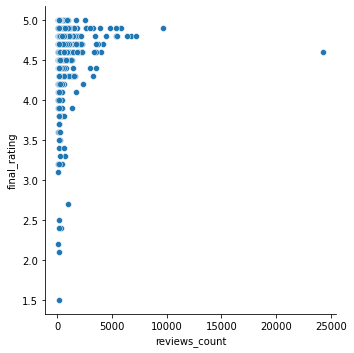

In [18]:
sns.relplot(data=df, x='reviews_count', y='final_rating')

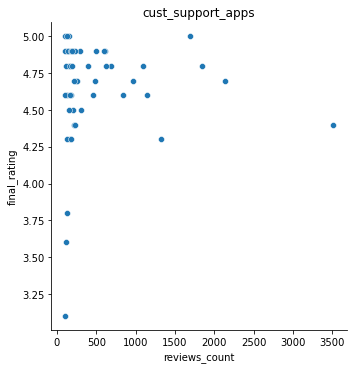

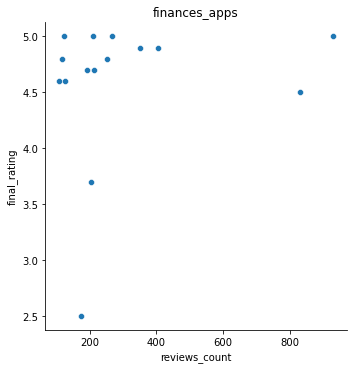

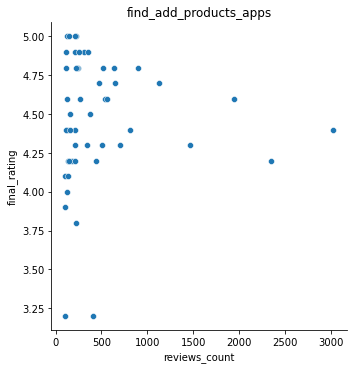

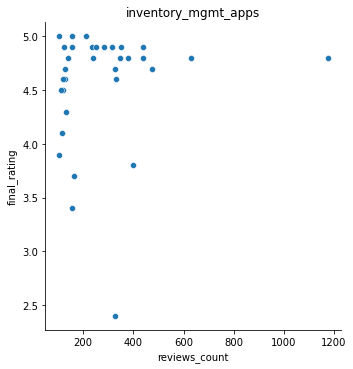

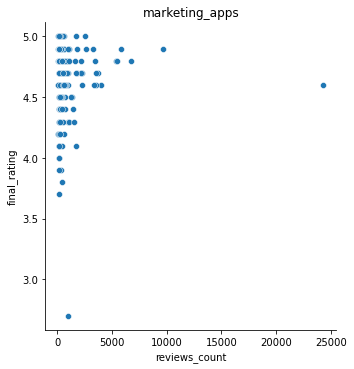

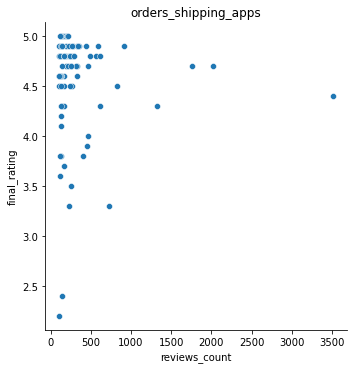

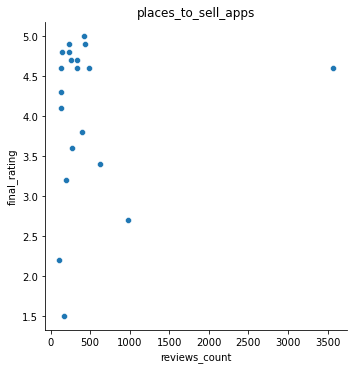

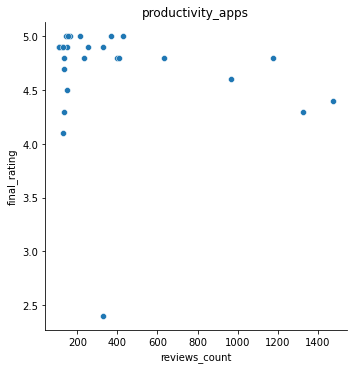

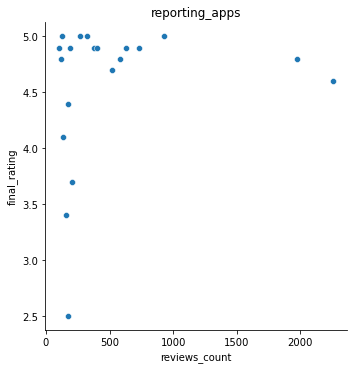

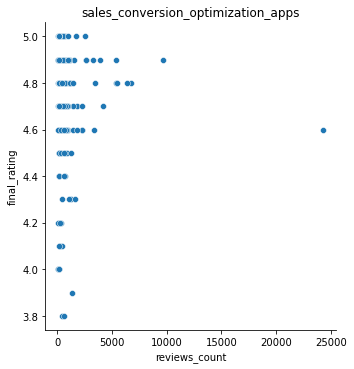

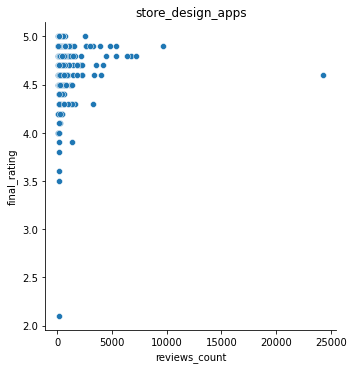

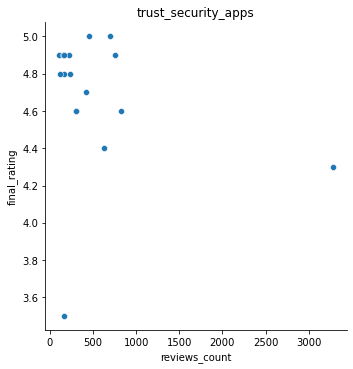

In [19]:
#Analysis by App Type
for k,v in app_subsets_dict.items():
    sns.relplot(
    data=app_subsets_dict[k],
    x="reviews_count", y="final_rating")
    plt.title(k)

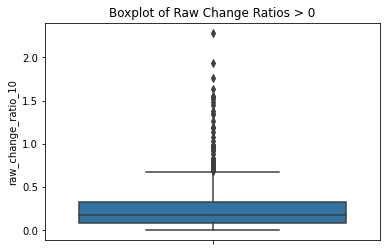

In [20]:
#Creation of a raw change value from avg of first 10 ratings vs final rating
df['raw_change_ratio_10'] = abs(df['final_rating_detailed']-df['first_10_ratings'])
changes_greater_than_0_first_10 = df[df['raw_change_ratio_10'] > 0]
sns.boxplot(data=changes_greater_than_0_first_10, 
            y="raw_change_ratio_10")
plt.title("Boxplot of Raw Change Ratios > 0")
plt.show()

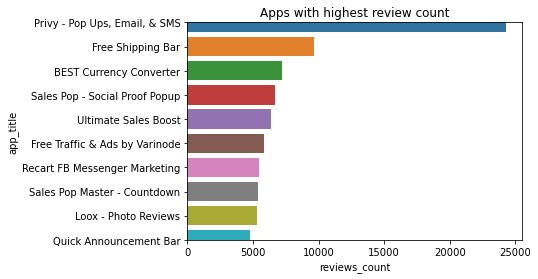

In [21]:
#Visualization of top 10 apps by review count
limit = 9
sorted_reviews = df.sort_values('reviews_count', ascending=False)
sorted_reviews.head()

sns.barplot(data=sorted_reviews, y='app_title', x='reviews_count', palette='tab10')
plt.ylim(limit, 0)
#plt.xticks(rotation=90)
plt.title('Apps with highest review count')
plt.show()

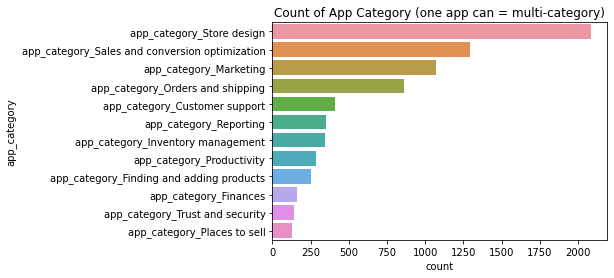

In [22]:
#Visualization of popularity of apps by raw count of categories
sns.barplot(data=category_count_df, y='app_category', x='count')
#plt.xlim(0, limit)
#plt.xticks(rotation=90)
plt.title('Count of App Category (one app can = multi-category)')
plt.show()

In [23]:
#Setup of temporary dataframe for next step
apps_and_reviews = pd.merge(reviews_df, df, how='left')
sorted_apps_and_reviews = apps_and_reviews.sort_values('reviews_count', ascending=False)

#Creation of counter for each tier (1-5) rating by category
ratings_per_category_df = pd.DataFrame({'category':category_count_df['app_category'],
'rating_1':[sorted_apps_and_reviews.loc[(sorted_apps_and_reviews[x] == 1) &
     (sorted_apps_and_reviews['individual_rating'] == 1.0)]['final_rating_detailed'].count()
     for x in category_count_df['app_category']],                              
'rating_2': [sorted_apps_and_reviews.loc[(sorted_apps_and_reviews[x] == 1) &
    (sorted_apps_and_reviews['individual_rating'] == 2.0)]['final_rating_detailed'].count()
    for x in category_count_df['app_category']],
'rating_3': [sorted_apps_and_reviews.loc[(sorted_apps_and_reviews[x] == 1) &
    (sorted_apps_and_reviews['individual_rating'] == 3.0)]['final_rating_detailed'].count()
    for x in category_count_df['app_category']],
'rating_4': [sorted_apps_and_reviews.loc[(sorted_apps_and_reviews[x] == 1) &
    (sorted_apps_and_reviews['individual_rating'] == 4.0)]['final_rating_detailed'].count()
    for x in category_count_df['app_category']],
'rating_5': [sorted_apps_and_reviews.loc[(sorted_apps_and_reviews[x] == 1) &
    (sorted_apps_and_reviews['individual_rating'] == 5.0)]['final_rating_detailed'].count()
    for x in category_count_df['app_category']]
})

ratings_per_category_df

,category,rating_1,rating_2,rating_3,rating_4,rating_5
0,app_category_Store design,5367,1901,5248,22420,208907
1,app_category_Sales and conversion optimization,3508,1334,3903,16879,153027
2,app_category_Marketing,4846,1554,4264,17478,146521
3,app_category_Orders and shipping,1484,386,543,1755,24263
4,app_category_Customer support,719,221,468,1984,21522
5,app_category_Reporting,351,75,185,803,8953
6,app_category_Inventory management,555,121,150,476,7795
7,app_category_Productivity,589,152,256,740,8530
8,app_category_Finding and adding products,1587,399,500,1514,19343
9,app_category_Finances,220,52,44,216,3968


In [24]:
#Set Index so apply statement in next step will work correctly
ratings_per_category_df = ratings_per_category_df.set_index('category')

#Changing total review count by category to percentage (by category)
ratings_per_category = ratings_per_category_df.iloc[:, :].T.apply(lambda x: x / x.sum(axis=0))
ratings_per_category = ratings_per_category.T.reset_index()
ratings_per_category

,category,rating_1,rating_2,rating_3,rating_4,rating_5
0,app_category_Store design,0.022010,0.007796,0.021522,0.091944,0.856727
1,app_category_Sales and conversion optimization,0.019636,0.007467,0.021847,0.094480,0.856570
2,app_category_Marketing,0.027745,0.008897,0.024413,0.100067,0.838878
3,app_category_Orders and shipping,0.052197,0.013577,0.019099,0.061728,0.853399
4,app_category_Customer support,0.028859,0.008871,0.018785,0.079634,0.863852
5,app_category_Reporting,0.033857,0.007234,0.017845,0.077457,0.863606
6,app_category_Inventory management,0.061009,0.013301,0.016489,0.052325,0.856876
7,app_category_Productivity,0.057368,0.014805,0.024934,0.072076,0.830817
8,app_category_Finding and adding products,0.067986,0.017093,0.021420,0.064859,0.828642
9,app_category_Finances,0.048889,0.011556,0.009778,0.048000,0.881778


In [25]:
#Melting ratings dataframe for visualization
ratings_melted = pd.melt(ratings_per_category, id_vars=['category'], value_vars=['rating_1', 'rating_2','rating_3','rating_4','rating_5'],
       var_name='rating_tier', value_name='percentage')

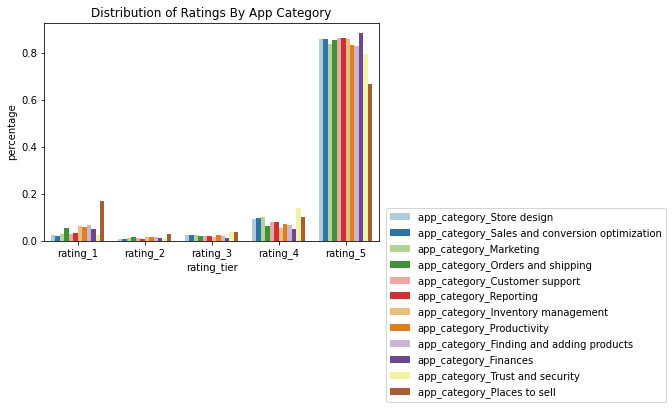

In [26]:
#Visualization of Ratings by App Category
sns.barplot(data=ratings_melted, x='rating_tier', y='percentage', 
            hue="category", palette="Paired")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
plt.title("Distribution of Ratings By App Category")
plt.show()

## 3. Modeling

### Text Sentiment Analysis

In [27]:
#Vaders Sentiment Scoring
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

#Bert Sentiment Scoring
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

### Vaders Sentiment Scoring

In [28]:
sia = SentimentIntensityAnalyzer()

In [40]:
results = {}
for i, row in tqdm(reviews_df.iterrows(), total = len(reviews_df)):
    text = row['body']
    review_id = row['review_id']
    results[review_id] = sia.polarity_scores(text)

  0%|          | 0/394613 [00:00<?, ?it/s]

In [31]:
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index':'review_id'})
vaders = vaders.merge(reviews_df, how = 'left')
vaders.head()

,review_id,neg,neu,pos,compound,index,id,author,individual_rating,posted_at,body,helpful_count
0,1,0.0,0.438,0.562,0.9336,0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0
1,2,0.0,0.913,0.087,0.6948,1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0
2,3,0.0,0.606,0.394,0.9741,2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0
3,4,0.0,0.451,0.549,0.9670,3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0
4,5,0.0,0.695,0.305,0.8748,4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0


In [33]:
#Preview of sentiment score & metadata
vaders.head(10)

,review_id,neg,neu,pos,compound,index,id,author,individual_rating,posted_at,body,helpful_count
0,1,0.0,0.438,0.562,0.9336,0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0
1,2,0.0,0.913,0.087,0.6948,1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0
2,3,0.0,0.606,0.394,0.9741,2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0
3,4,0.0,0.451,0.549,0.9670,3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0
4,5,0.0,0.695,0.305,0.8748,4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,318,0.0,0.644,0.356,0.9118,317,2708059b-06ae-4c7a-bbee-26b984db3547,Netshopny,5,2020-07-31,"Good jog just add it to my store, I don't use ...",0
96,326,0.0,0.923,0.077,0.2732,325,2708059b-06ae-4c7a-bbee-26b984db3547,HMPS.,4,2020-07-30,Have to see how well this works. We are a star...,0
97,338,0.0,0.769,0.231,0.6249,337,2708059b-06ae-4c7a-bbee-26b984db3547,Goodsbydb,5,2020-07-24,Just installed the app ..................just ...,0
98,339,0.0,1.000,0.000,0.0000,338,2708059b-06ae-4c7a-bbee-26b984db3547,shop416.com,5,2020-07-24,i just downloaded the app to see how it perfor...,0


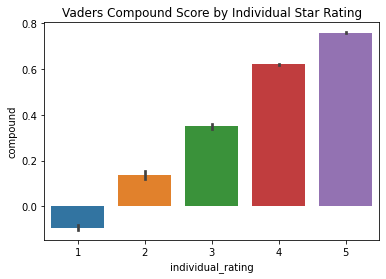

In [34]:
ax = sns.barplot(data=vaders, x='individual_rating', y='compound')
ax.set_title('Vaders Compound Score by Individual Star Rating')
plt.show()

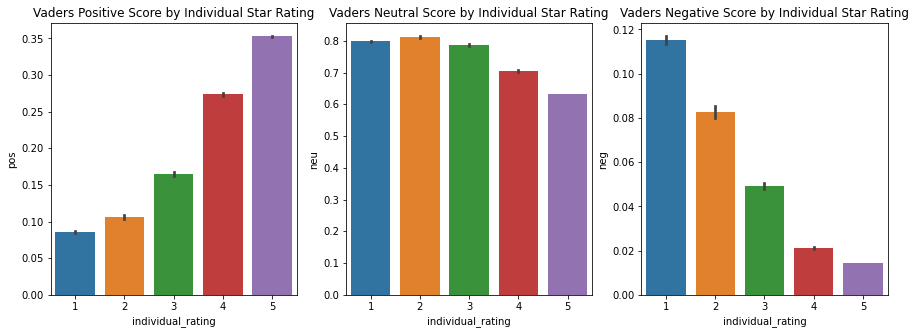

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='individual_rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='individual_rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='individual_rating', y='neg', ax=axs[2])
axs[0].set_title('Vaders Positive Score by Individual Star Rating')
axs[1].set_title('Vaders Neutral Score by Individual Star Rating')
axs[2].set_title('Vaders Negative Score by Individual Star Rating')
plt.show()

### roBERTa Sentiment Scoring

In [36]:
MODEL =  f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [41]:
results = {}

for i, row in tqdm(reviews_df.head(1000).iterrows(), total = len(reviews_df)):
        try:
            text = row['body']
            review_id = row['review_id']
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            results[review_id] = both
        except RuntimeError:
            print(f'Broke for id {review_id}')

  0%|          | 0/394613 [00:00<?, ?it/s]

Broke for id 136
Broke for id 1037


In [66]:
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index':'review_id'})
results_df = results_df.merge(reviews_df, how='left')
results_df.head(5)

,review_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,id,author,individual_rating,posted_at,body,helpful_count
0,1,0.0,0.438,0.562,0.9336,0.001606,0.017218,0.981176,0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,2020-08-06,Great and super fast customer service! Highly ...,0
1,2,0.0,0.913,0.087,0.6948,0.001566,0.010780,0.987654,1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,2020-08-04,"Still setting up my store, and after initially...",0
2,3,0.0,0.606,0.394,0.9741,0.002098,0.015664,0.982237,2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,2020-08-04,"This is an excellent search app, which they ha...",0
3,4,0.0,0.451,0.549,0.9670,0.001731,0.014654,0.983615,3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,2020-07-30,"A+, great great great customer service! thanks...",0
4,5,0.0,0.695,0.305,0.8748,0.003537,0.025207,0.971255,4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,2020-07-28,"I'm begginig to use this app, the search engin...",0


### Compare scores between models

In [67]:
results_df.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'index', 'id', 'author',
       'individual_rating', 'posted_at', 'body', 'helpful_count'],
      dtype='object')

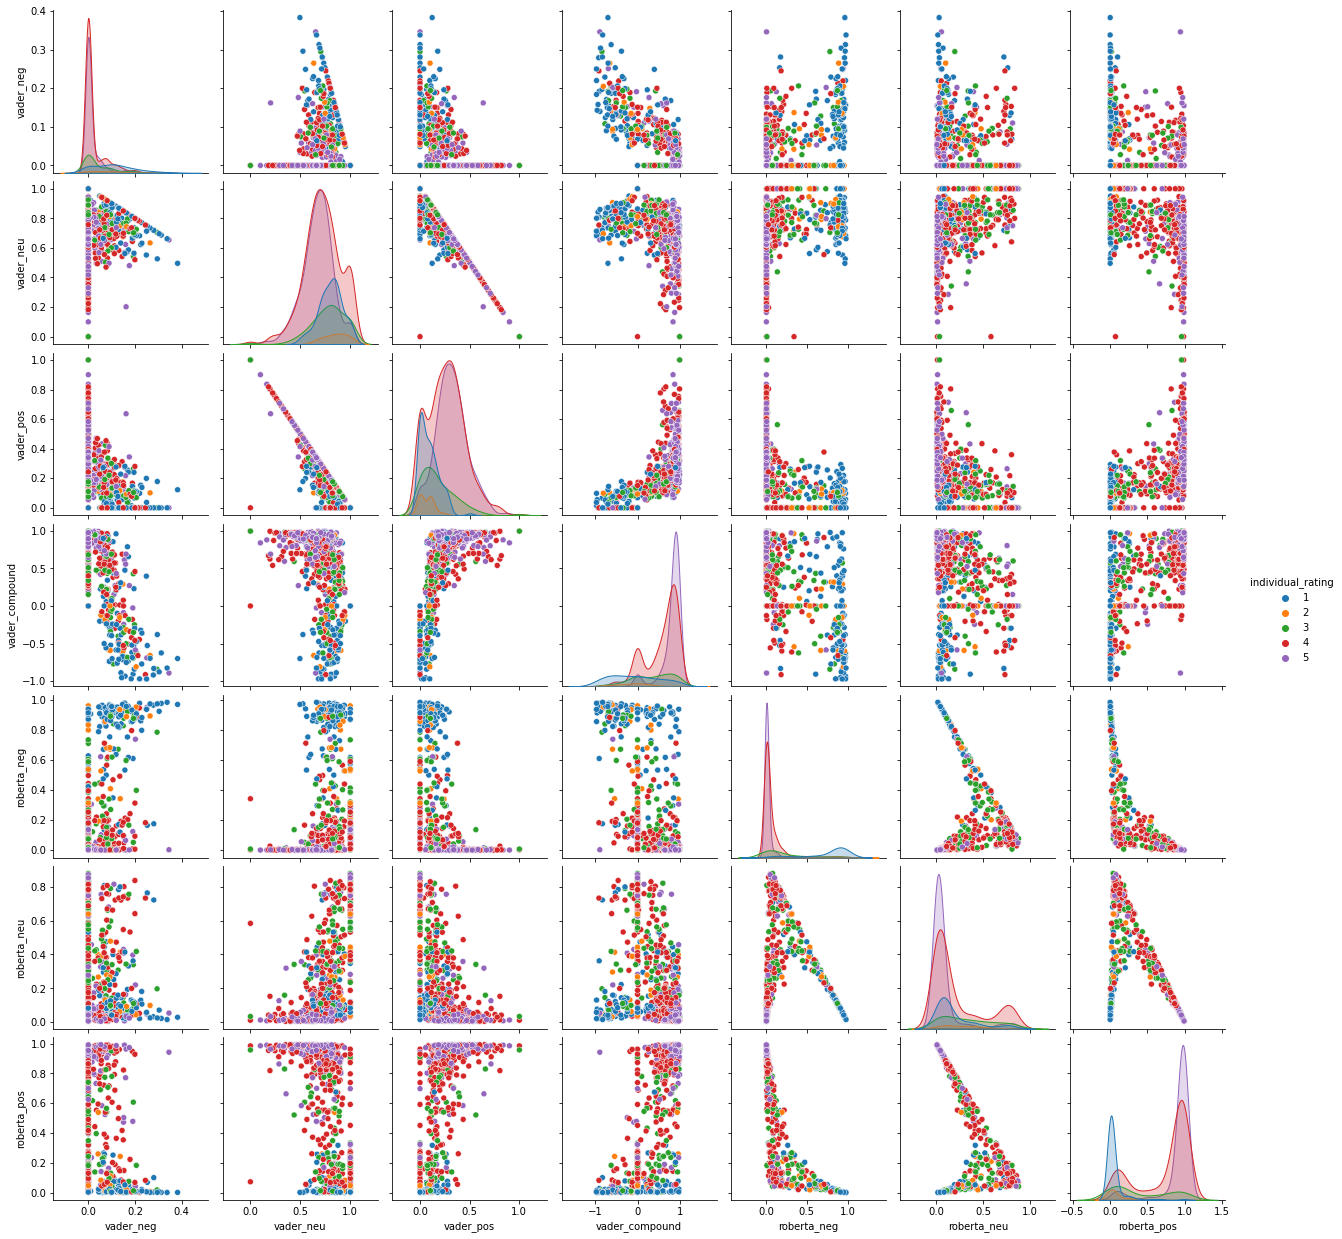

In [68]:
sns.pairplot(data=results_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='individual_rating',
             palette='tab10')
plt.show()

In [83]:
print('Highest Roberta Score with 1 Star Rating:')
print(results_df.query('individual_rating == 1')\
    .sort_values('roberta_pos', ascending=False)['body'].values[0])

print('\n')

print('Highest Vader Score with 1 Star Rating:')
print(results_df.query('individual_rating == 1')\
    .sort_values('vader_pos', ascending=False)['body'].values[0])

Highest Roberta Score with 1 Star Rating:
Love this app great job guys one of the best app easy to work with  10 Pl use keep up the good work a


Highest Vader Score with 1 Star Rating:
Love this app great job guys one of the best app easy to work with  10 Pl use keep up the good work a


In [84]:
print('Lowest Roberta Score with 5 Star Rating:')
print(results_df.query('individual_rating == 5')\
    .sort_values('roberta_neg', ascending=False)['body'].values[0])

print('\n')

print('Lowest Vader Score with 5 Star Rating:')
print(results_df.query('individual_rating == 5')\
    .sort_values('vader_neg', ascending=False)['body'].values[0])

Lowest Roberta Score with 5 Star Rating:
ruined my add to cart, checkout buttons, they're not working anymore even after i deleted the app, losing customers currently..


Lowest Vader Score with 5 Star Rating:
When I used this app so No SEO problem with . that's incredible for me.
When I used this app so No SEO problem with . that's incredible for me.
